In [192]:
## Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.cluster import KMeans
sns.set()

In [193]:
## Reading the data
data = pd.read_csv('data.csv', low_memory=False)
pd.set_option('display.max_columns', None)
print(data.head())
print(data.shape)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

       InvoiceDate  UnitPrice  CustomerID         Country  
0  12-01-2010 8:26       2.55     17850.0  United Kingdom  
1  12-01-2010 8:26       3.39     17850.0  United Kingdom  
2  12-01-2010 8:26       2.75     17850.0  United Kingdom  
3  12-01-2010 8:26       3.39     17850.0  United Kingdom  
4  12-01-2010 8:26       3.39     17850.0  United Kingdom  
(541909, 8)


In [194]:
# There are a total of 5,41,909 entries with 8 features
print(data.describe())
print(data.info())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
d

In [195]:
## from the above stats it's clear that there are outliers

In [196]:
# Check for null values
print(data.isnull().any())
print(data.isnull().sum())

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [197]:
# description has 1454 missing values and CustomerID has 1,35,080 missing values which is quite a lot

In [198]:
# Let's drop null values especially the ones pertaining to CustomerID, as it is with respect to CustomerID that we are creating our segments. 
data = data[data.CustomerID.notnull()]
print(data.isnull().any())
print(data.shape)

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool
(406829, 8)


In [199]:
# Checking on outliers
print(data.describe())

            Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [200]:
# There are values in negative which have to be checked (maybe because of return) and also some extreme values for UnitPrice such as 0 and 38970
print("Percentile of Quantity:\n",data["Quantity"].quantile([0.0,0.001, .5, .90, .99, 0.999]))
print("Percentile of UnitPrice:\n",data["UnitPrice"].quantile([0.0,0.001, .5, .90, .99, 0.999]))

Percentile of Quantity:
 0.000   -80995.0
0.001      -40.0
0.500        5.0
0.900       24.0
0.990      120.0
0.999      504.0
Name: Quantity, dtype: float64
Percentile of UnitPrice:
 0.000     0.00
0.001     0.12
0.500     1.95
0.900     6.75
0.990    15.00
0.999    50.00
Name: UnitPrice, dtype: float64


In [201]:
# outlier removal for Quantity
data = data[(-600 < data['Quantity']) & (data['Quantity'] < 600)]
print(data.shape)
# Outlier removal for UnitPrice
data = data[(0 < data['UnitPrice']) & (data['UnitPrice'] < 100)]
print(data.shape)

(406476, 8)
(406135, 8)


In [202]:
# Checking for proper datetypes
print(data.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [203]:
# Converting Invoice date to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print(data.dtypes)
print(data.InvoiceDate)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object
0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406135, dtype: datetime64[ns]


# Exploratory Data Analysis

In [204]:
# we can create many new variables to get insights about the data

In [205]:
# creating new variables for our analysis
# 1. We can segment customers based on their continent
# Let's get a unique value count for the countries.
# Since there are no missing values in Country column, le's consider the whole dataset
print(data['Country'].value_counts())
print(f"The total number of countries: {data['Country'].nunique() - 1}") # There is one category of unspecified country

United Kingdom          361308
Germany                   9479
France                    8479
EIRE                      7473
Spain                     2530
Netherlands               2357
Belgium                   2069
Switzerland               1876
Portugal                  1468
Australia                 1250
Norway                    1078
Italy                      802
Channel Islands            756
Finland                    694
Cyprus                     614
Sweden                     459
Austria                    401
Denmark                    389
Japan                      354
Poland                     341
USA                        291
Israel                     249
Unspecified                244
Singapore                  214
Iceland                    182
Canada                     150
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         57
Lebanon                     45
Lithuani

In [206]:
# Initialise the continent column
data['Continent'] = 'Unspecified'
print(data.head())

# Create a list of all countries
Country_list = list(np.unique(np.array(data['Country'])))
print(Country_list)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country    Continent  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  Unspecified  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Unspecified  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  Unspecified  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Unspecified  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Unspecified  
['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada', 'Channel Islands', 'Cyprus', 'Czech Republic

In [207]:
# list of countries by continent
Europe = ['Austria', 'Belgium', 'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE', 'European Community', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Italy', 'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom']
Asia = ['Bahrain', 'Hong Kong', 'Israel', 'Japan', 'Lebanon', 'Saudi Arabia', 'Singapore', 'United Arab Emirates']
Africa = ['RSA']
North_America = ['Canada', 'USA']
South_America = ['Brazil']
Oceania = ['Australia']

In [208]:
# Europe
data['Continent'] = np.where(data.Country.isin(Europe), "Europe", data['Continent'])
# print(data)

# Asia
data['Continent'] = np.where(data.Country.isin(Asia), "Asia", data['Continent'])

# Africa
data['Continent'] = np.where(data.Country.isin(Africa), "Africa", data['Continent'])

# North_America
data['Continent'] = np.where(data.Country.isin(North_America), "North_America", data['Continent'])

# South_America
data['Continent'] = np.where(data.Country.isin(South_America), "South_America", data['Continent'])

# Oceania
data['Continent'] = np.where(data.Country.isin(Oceania), "Oceania", data['Continent'])
print(data)


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country Continent

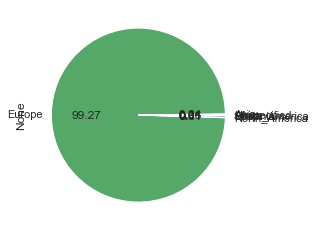

In [209]:
# piechart denoting the countries
data.groupby('Continent').size().plot(kind='pie', autopct='%.2f')
plt.show()

In [210]:
# The plot clearly shows that 99% of values belong to Europe continet

In [211]:
## 2nd variable --- Based on economy of the country-- Developed/Developing/Under_developed -- Source IMF/ World Bank----##
Devoloped = ['Australia', 'Austria', 'Belgium', 'Canada', 'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE', 'European Community', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom']
Developing = ['Bahrain', 'Brazil', 'Lebanon', 'RSA', 'Saudi Arabia']
Under_developed = []

# let's initialise with unspecified
data['Economic_status'] = "Unspecified"

In [212]:
# developed
data['Economic_status'] = np.where(data.Country.isin(Devoloped), "Developed", data['Economic_status'])
print(data)

# Developing
data['Economic_status'] = np.where(data.Country.isin(Developing), "Developing", data['Economic_status'])

# Since there are no under_developed countries in the data, we can skip this


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country Continent

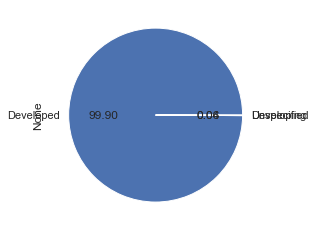

In [213]:
data.groupby('Economic_status').size().plot(kind='pie', autopct='%.2f')
plt.show()

In [214]:
# Again 99% of the data belongs to Developed Nations as almost all countries in the Europe are economically developed

In [215]:
##----------3rd variable----Day_of_week------##
data['day_of_week'] = data['InvoiceDate'].dt.day_name()
print(data)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country Continent

In [216]:
data.day_of_week.value_counts()

Thursday     82209
Wednesday    70473
Tuesday      67963
Monday       66243
Sunday       63205
Friday       56042
Name: day_of_week, dtype: int64

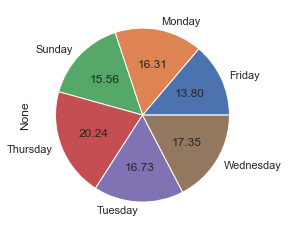

In [218]:
data.groupby('day_of_week').size().plot(kind='pie', autopct='%.2f')
plt.show()

In [219]:
# Looks like the business is evenly spread out throughout the week

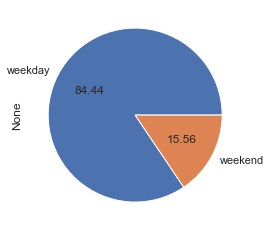

In [220]:
##----------4th variable - Weekend (0 =weekday, 1= weekend) -----------##
data['weekend/weekday'] = 'weekday'
weekend = ['Saturday', 'Sunday']
data['weekend/weekday'] = np.where(data['day_of_week'].isin(weekend), "weekend", data['weekend/weekday'])
data.groupby('weekend/weekday').size().plot(kind='pie', autopct='%.2f')
plt.show()

November     65536
October      50601
December     44436
September    40761
May          28850
June         27791
March        27758
August       27616
July         27462
April        23130
January      21866
February     20328
Name: Month, dtype: int64


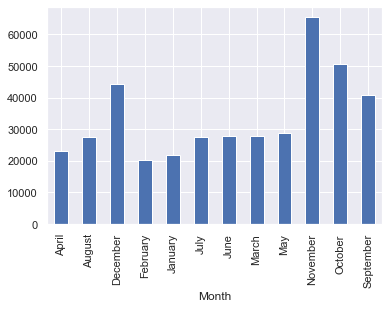

In [221]:
##======== 5th variable - Month ----------------------##
data['Month'] = data['InvoiceDate'].dt.month_name(locale='English')
print(data.Month.value_counts())
data.groupby('Month').size().plot(kind='bar')
plt.show()

In [222]:
# looks like November month has the maximum sales and January has the least sales

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country Continent

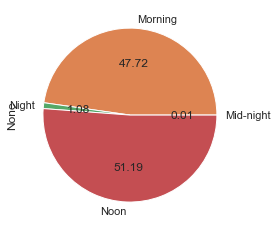

In [223]:
##---------6th variable - Session of day ----------##
data['Hour'] = data['InvoiceDate'].dt.hour
print(data)


def f(x):
    if (x > 0) and (x <= 6):
        return 'Mid-night'
    elif (x > 6) and (x <= 12):
        return 'Morning'
    elif (x > 12) and (x <= 18):
        return 'Noon'
    elif (x > 18) and (x <= 24):
        return'Night'


data['Session'] = data['Hour'].apply(f)
# print(data)
data.groupby('Session').size().plot(kind='pie', autopct='%.2f')
plt.show()

In [224]:
# Looks like there is hardly any business between 6PM and 6AM implying that the store might be closed

# It's pretty clear from the above EDA that the dataset mostly contains United kingdom data.
# Therefore there is no point in creating geographical variables(it will be imbalanced dataset).

# Feature Engineering 
# Now let's create more number of variables
# 1. User Level
# 2. Transaction Level

In [225]:
# 1. User level variables
# Calculating the total sales
data['sales'] = data['Quantity']*data['UnitPrice']
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country Continent  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom    Europe   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    Europe   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom    Europe   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    Europe   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    Europe   

  Economic_status day_of_week weekend/weekday     Month  Hour  Session  sales  
0       Developed   Wednesday         week

In [226]:
# Transaction level variable
User_Invoice_data = data1.groupby(['CustomerID', 'InvoiceNo', 'InvoiceDate', 'visit_30d']).agg(
                                                                                                Total_item_perInvoice=('Quantity', np.sum),
                                                                                                Unique_item_perInvoice=('Quantity', np.count_nonzero), # np.count_nonzero basically counts the number of rows
                                                                                                total_spend_perInvoice=('sales', np.sum)).reset_index()
pd.set_option('display.max_columns', None)
print(User_Invoice_data.head())


   CustomerID InvoiceNo         InvoiceDate  visit_30d  Total_item_perInvoice  \
0     12347.0    537626 2010-12-07 14:57:00          1                    319   
1     12347.0    542237 2011-01-26 14:30:00          1                    315   
2     12347.0    549222 2011-04-07 10:43:00          1                    483   
3     12347.0    556201 2011-06-09 13:01:00          1                    196   
4     12347.0    562032 2011-08-02 08:48:00          1                    277   

   Unique_item_perInvoice  total_spend_perInvoice  
0                      31                  711.79  
1                      29                  475.39  
2                      24                  636.25  
3                      18                  382.52  
4                      22                  584.91  


In [227]:
# User level data to understand their behaviour

In [228]:
user_data = User_Invoice_data.groupby('CustomerID').agg(Minimum_Date=('InvoiceDate', np.min),
                                                        Maximum_Date=('InvoiceDate', np.max),
                                                        t_quantity=("Total_item_perInvoice", np.sum),
                                                        t_salesvalue=('total_spend_perInvoice', np.sum),
                                                        Total_visit=('InvoiceDate', pd.Series.nunique),
                                                        avg_quanity=("Total_item_perInvoice", np.mean),
                                                        min_quanity=("Total_item_perInvoice", np.min),
                                                        max_quanity=("Total_item_perInvoice", np.max),
                                                        med_quanity=("Total_item_perInvoice", np.median),
                                                        max_spend=('total_spend_perInvoice', np.max),
                                                        min_spend=('total_spend_perInvoice', np.min),
                                                        avg_spend=('total_spend_perInvoice', np.mean),
                                                        med_spend=('total_spend_perInvoice', np.median),
                                                        total_visit_30d=('visit_30d', np.count_nonzero)
                                                        ).reset_index()
print(user_data.head())

   CustomerID        Minimum_Date        Maximum_Date  t_quantity  \
0     12347.0 2010-12-07 14:57:00 2011-12-07 15:52:00        2458   
1     12348.0 2010-12-16 19:09:00 2011-09-25 13:13:00        2341   
2     12349.0 2011-11-21 09:51:00 2011-11-21 09:51:00         630   
3     12350.0 2011-02-02 16:01:00 2011-02-02 16:01:00         197   
4     12352.0 2011-02-16 12:33:00 2011-11-03 14:37:00         470   

   t_salesvalue  Total_visit  avg_quanity  min_quanity  max_quanity  \
0       4310.00            7   351.142857          192          676   
1       1797.24            4   585.250000          217         1254   
2       1457.55            1   630.000000          630          630   
3        334.40            1   197.000000          197          197   
4       1545.41            8    58.750000          -63          127   

   med_quanity  max_spend  min_spend    avg_spend  med_spend  total_visit_30d  
0        315.0    1294.32     224.82   615.714286     584.91                7 

In [229]:
# Creating additional user purchase date history details
user_data['last_date'] = max(data['InvoiceDate'])
user_data['last_visit'] = user_data['last_date'] - user_data['Maximum_Date']
user_data['last_visit'] = user_data['last_visit'].dt.days

In [230]:
# Purchasing power of the customer - This tells us the average amount spent by a customer per item
user_data['purchase_power'] = user_data['t_salesvalue']/user_data['t_quantity']

In [231]:
pd.set_option('display.max_columns', None)
user_data.head()

,CustomerID,Minimum_Date,Maximum_Date,t_quantity,t_salesvalue,Total_visit,avg_quanity,min_quanity,max_quanity,med_quanity,max_spend,min_spend,avg_spend,med_spend,total_visit_30d,last_date,last_visit,purchase_power
0,12347.0,2010-12-07 14:57:00,2011-12-07 15:52:00,2458,4310.00,7,351.142857,192,676,315.0,1294.32,224.82,615.714286,584.91,7,2011-12-09 12:50:00,1,1.753458
1,12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,2341,1797.24,4,585.250000,217,1254,435.0,892.80,227.44,449.310000,338.50,0,2011-12-09 12:50:00,74,0.767723
2,12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,630,1457.55,1,630.000000,630,630,630.0,1457.55,1457.55,1457.550000,1457.55,1,2011-12-09 12:50:00,18,2.313571
3,12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,197,334.40,1,197.000000,197,197,197.0,334.40,334.40,334.400000,334.40,0,2011-12-09 12:50:00,309,1.697462
4,12352.0,2011-02-16 12:33:00,2011-11-03 14:37:00,470,1545.41,8,58.750000,-63,127,63.5,366.25,-120.33,193.176250,213.29,0,2011-12-09 12:50:00,35,3.288106


In [232]:
user_data.columns

Index(['CustomerID', 'Minimum_Date', 'Maximum_Date', 't_quantity',
       't_salesvalue', 'Total_visit', 'avg_quanity', 'min_quanity',
       'max_quanity', 'med_quanity', 'max_spend', 'min_spend', 'avg_spend',
       'med_spend', 'total_visit_30d', 'last_date', 'last_visit',
       'purchase_power'],
      dtype='object')

In [233]:
## Checking for correlation
user_data.corr()

,CustomerID,t_quantity,t_salesvalue,Total_visit,avg_quanity,min_quanity,max_quanity,med_quanity,max_spend,min_spend,avg_spend,med_spend,total_visit_30d,last_visit,purchase_power
CustomerID,1.000000,-0.023940,-0.017626,-0.018787,-0.094132,-0.032337,-0.077584,-0.087211,-0.076476,-0.047274,-0.126590,-0.123946,-0.023909,0.013328,-0.009634
t_quantity,-0.023940,1.000000,0.928292,0.576084,0.394825,-0.227593,0.792089,0.194382,0.734590,-0.250602,0.391493,0.207486,0.560433,-0.140773,-0.044112
t_salesvalue,-0.017626,0.928292,1.000000,0.574778,0.342085,-0.224000,0.724018,0.163280,0.813425,-0.244140,0.432581,0.251159,0.561622,-0.138378,-0.009681
Total_visit,-0.018787,0.576084,0.574778,1.000000,0.060020,-0.345885,0.370454,-0.015019,0.368717,-0.378505,0.084780,0.018793,0.960146,-0.260733,-0.027698
avg_quanity,-0.094132,0.394825,0.342085,0.060020,1.000000,0.579867,0.722558,0.927956,0.578346,0.433468,0.833350,0.767425,0.066489,-0.111249,-0.189270
min_quanity,-0.032337,-0.227593,-0.224000,-0.345885,0.579867,1.000000,-0.019907,0.657698,-0.089088,0.873850,0.437805,0.503248,-0.304781,0.108274,-0.096099
max_quanity,-0.077584,0.792089,0.724018,0.370454,0.722558,-0.019907,1.000000,0.475231,0.871768,-0.094082,0.646572,0.427183,0.350195,-0.179433,-0.123763
med_quanity,-0.087211,0.194382,0.163280,-0.015019,0.927956,0.657698,0.475231,1.000000,0.364028,0.507193,0.758981,0.817720,-0.001592,-0.088579,-0.188429
max_spend,-0.076476,0.734590,0.813425,0.368717,0.578346,-0.089088,0.871768,0.364028,1.000000,-0.101262,0.713793,0.490882,0.352642,-0.157669,-0.020018
min_spend,-0.047274,-0.250602,-0.244140,-0.378505,0.433468,0.873850,-0.094082,0.507193,-0.101262,1.000000,0.500335,0.570411,-0.330296,0.137807,0.001242


In [234]:
# Heatmap
corr = user_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,CustomerID,t_quantity,t_salesvalue,Total_visit,avg_quanity,min_quanity,max_quanity,med_quanity,max_spend,min_spend,avg_spend,med_spend,total_visit_30d,last_visit,purchase_power
CustomerID,1.000000,-0.023940,-0.017626,-0.018787,-0.094132,-0.032337,-0.077584,-0.087211,-0.076476,-0.047274,-0.126590,-0.123946,-0.023909,0.013328,-0.009634
t_quantity,-0.023940,1.000000,0.928292,0.576084,0.394825,-0.227593,0.792089,0.194382,0.734590,-0.250602,0.391493,0.207486,0.560433,-0.140773,-0.044112
t_salesvalue,-0.017626,0.928292,1.000000,0.574778,0.342085,-0.224000,0.724018,0.163280,0.813425,-0.244140,0.432581,0.251159,0.561622,-0.138378,-0.009681
Total_visit,-0.018787,0.576084,0.574778,1.000000,0.060020,-0.345885,0.370454,-0.015019,0.368717,-0.378505,0.084780,0.018793,0.960146,-0.260733,-0.027698
avg_quanity,-0.094132,0.394825,0.342085,0.060020,1.000000,0.579867,0.722558,0.927956,0.578346,0.433468,0.833350,0.767425,0.066489,-0.111249,-0.189270
min_quanity,-0.032337,-0.227593,-0.224000,-0.345885,0.579867,1.000000,-0.019907,0.657698,-0.089088,0.873850,0.437805,0.503248,-0.304781,0.108274,-0.096099
max_quanity,-0.077584,0.792089,0.724018,0.370454,0.722558,-0.019907,1.000000,0.475231,0.871768,-0.094082,0.646572,0.427183,0.350195,-0.179433,-0.123763
med_quanity,-0.087211,0.194382,0.163280,-0.015019,0.927956,0.657698,0.475231,1.000000,0.364028,0.507193,0.758981,0.817720,-0.001592,-0.088579,-0.188429
max_spend,-0.076476,0.734590,0.813425,0.368717,0.578346,-0.089088,0.871768,0.364028,1.000000,-0.101262,0.713793,0.490882,0.352642,-0.157669,-0.020018
min_spend,-0.047274,-0.250602,-0.244140,-0.378505,0.433468,0.873850,-0.094082,0.507193,-0.101262,1.000000,0.500335,0.570411,-0.330296,0.137807,0.001242


# Feature selection for our model
# A very famous type of model for Customer Segmentation is RFM model
# R - Recency, F - Frequency, M - monetary

# Categorising our features into the above three segments
# Recency - last_visit, Minimum_Date, Maximum_Date
# Frequency - total_visit, total_visit_30d
# Monetary - The remaining features all belomg to monetary segment

In [235]:
# fetaures going into our model 
df_select = user_data[["t_quantity","t_salesvalue","Total_visit","avg_quanity","min_quanity","max_quanity","med_quanity",
 "max_spend","min_spend","avg_spend","med_spend","total_visit_30d","last_visit"]]

In [236]:
## Elbow curve to identify right number of clusters
wcss = []
for i in range(1,12):
    km = KMeans(n_clusters=i)
    km.fit(df_select)
    wcss.append(km.inertia_)

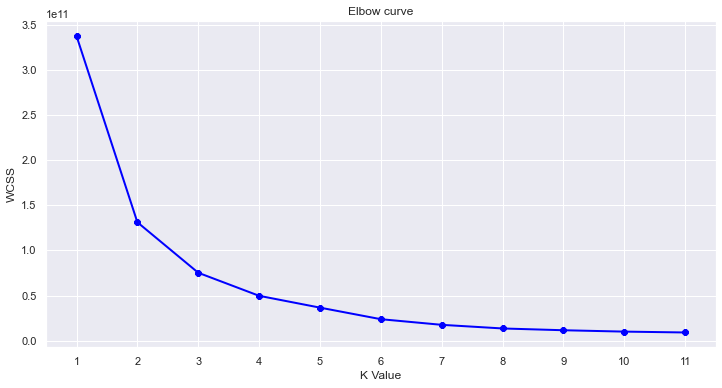

In [237]:
## Plotting the elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,12),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,12,1))
plt.title("Elbow curve")
plt.ylabel("WCSS")
plt.show()

# From the elbow curve it is clearly seen that after 4 clusters the wcss is constant
# Therefore I would choose to segment my customers into 4 clusters

In [238]:
# Taking 4 clusters
km1 = KMeans(n_clusters=4)
# Fitting the input data
km1.fit(df_select)
# predicting the labels of the input data
y = km1.predict(df_select)
# adding the labels to a column named label
df_select["label"] = y
# The new dataframe with the clustering done
print(df_select.head())

   t_quantity  t_salesvalue  Total_visit  avg_quanity  min_quanity  \
0        2458       4310.00            7   351.142857          192   
1        2341       1797.24            4   585.250000          217   
2         630       1457.55            1   630.000000          630   
3         197        334.40            1   197.000000          197   
4         470       1545.41            8    58.750000          -63   

   max_quanity  med_quanity  max_spend  min_spend    avg_spend  med_spend  \
0          676        315.0    1294.32     224.82   615.714286     584.91   
1         1254        435.0     892.80     227.44   449.310000     338.50   
2          630        630.0    1457.55    1457.55  1457.550000    1457.55   
3          197        197.0     334.40     334.40   334.400000     334.40   
4          127         63.5     366.25    -120.33   193.176250     213.29   

   total_visit_30d  last_visit  label  
0                7           1      0  
1                0          74      

C:\Users\Carbon\AppData\Local\Temp/ipykernel_21876/2991960991.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["label"] = y


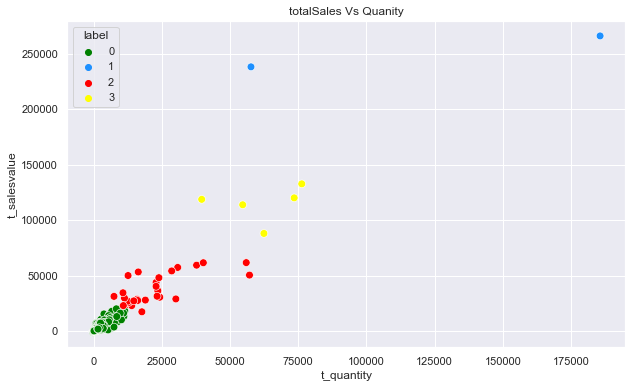

In [239]:
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='t_quantity', y='t_salesvalue', hue="label", palette=['green','dodgerblue','red','yellow'], legend='full', data=df_select, s=60) # s is scatter marker size
plt.xlabel('t_quantity')
plt.ylabel('t_salesvalue')
plt.title('totalSales Vs Quanity')
plt.show()

D:\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Carbon\AppData\Local\Temp/ipykernel_21876/2535624062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['t_q_log'] = np.log(df_select['t_quantity'])
C:\Users\Carbon\AppData\Local\Temp/ipykernel_21876/2535624062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

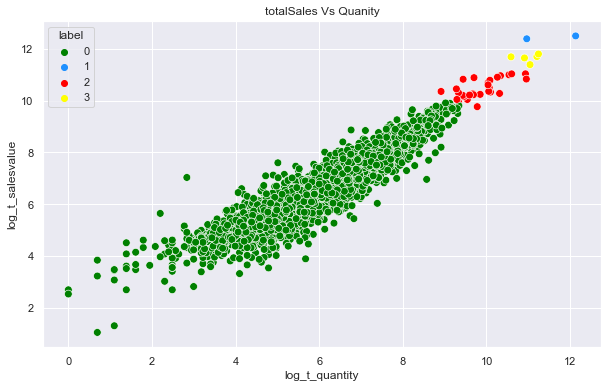

In [240]:
# log transformation of the data for better visualisation
df_select['t_q_log'] = np.log(df_select['t_quantity'])
df_select['t_s_log'] = np.log(df_select['t_salesvalue'])

plt.figure(figsize=(10,6))
sns.scatterplot(x = 't_q_log',y = 't_s_log',hue="label",  palette=['green','dodgerblue','red','yellow'], legend='full',data = df_select  ,s = 60 )
plt.xlabel('log_t_quantity')
plt.ylabel('log_t_salesvalue')
plt.title('totalSales Vs Quanity')
plt.show()

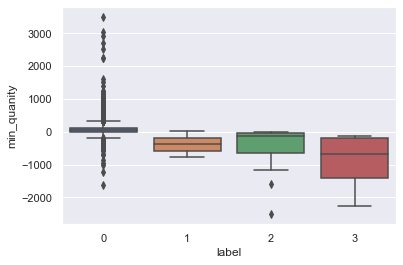

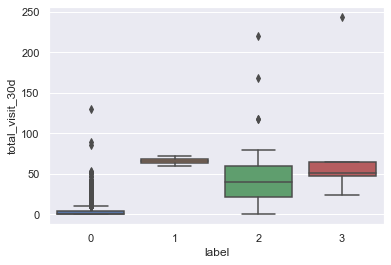

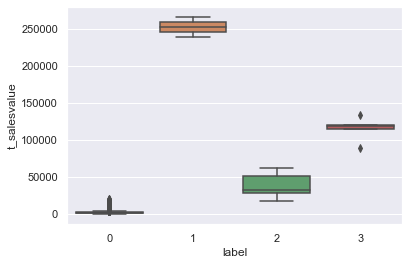

In [241]:
# Boxplots to descibe the segments better
sns.boxplot(x='label',y='min_quanity',data=df_select)
plt.show()
sns.boxplot(x='label',y='total_visit_30d',data=df_select)
plt.show()
sns.boxplot(x='label',y='t_salesvalue',data=df_select)
plt.show()

In [242]:
## summary of users in clusters -- help in describing for business actionability

# Seg 0
data_0 = df_select[df_select.label == 0]
data_0.head()
print("Seg_0")
print(data_0.describe())
print("\n\n------------------------------------------------------------\n\n")

Seg_0
         t_quantity  t_salesvalue  Total_visit  avg_quanity  min_quanity  \
count   4314.000000   4314.000000  4314.000000  4314.000000  4314.000000   
mean     793.354196   1358.892405     4.569541   181.763499    85.336579   
std     1185.825741   2064.324908     6.086204   192.823732   192.543265   
min     -336.000000  -1192.200000     1.000000  -244.000000 -1624.000000   
25%      152.000000    289.475000     1.000000    77.812500    -3.000000   
50%      359.500000    638.895000     3.000000   136.084101    42.000000   
75%      921.500000   1547.780000     5.000000   227.687500   128.000000   
max    11390.000000  20098.100000   129.000000  3504.000000  3504.000000   

       max_quanity  med_quanity    max_spend    min_spend    avg_spend  \
count  4314.000000   4314.00000  4314.000000  4314.000000  4314.000000   
mean    311.813862    172.79242   501.506507   142.233964   303.030337   
std     337.736221    193.78832   518.901592   310.966598   297.512198   
min    -244.0

In [243]:
# Seg 1
data_1 = df_select[df_select.label == 1]
data_1.head()
print("Seg_1")
print(data_1.describe())
print("\n\n------------------------------------------------------------\n\n")

Seg_1
          t_quantity   t_salesvalue  Total_visit  avg_quanity  min_quanity  \
count       2.000000       2.000000     2.000000     2.000000     2.000000   
mean   121680.000000  252108.930000    63.500000  1770.091667  -376.000000   
std     90529.466982   19714.038065    12.020815  1144.086987   554.371716   
min     57666.000000  238169.000000    55.000000   961.100000  -768.000000   
25%     89673.000000  245138.965000    59.250000  1365.595833  -572.000000   
50%    121680.000000  252108.930000    63.500000  1770.091667  -376.000000   
75%    153687.000000  259078.895000    67.750000  2174.587500  -180.000000   
max    185694.000000  266048.860000    72.000000  2579.083333    16.000000   

        max_quanity  med_quanity     max_spend   min_spend    avg_spend  \
count      2.000000     2.000000      2.000000    2.000000     2.000000   
mean    9741.000000   791.500000  21241.960000 -192.500000  3832.303194   
std     7055.511463   235.466558   1363.358443  386.221724   194.0

In [244]:
# Seg 2
data_2 = df_select[df_select.label == 2]
data_2.head()
print("Seg_2")
print(data_2.describe())
print("\n\n------------------------------------------------------------\n\n")

Seg_2
         t_quantity  t_salesvalue  Total_visit  avg_quanity  min_quanity  \
count     28.000000      28.00000    28.000000    28.000000    28.000000   
mean   22285.678571   37574.14750    54.214286   596.846241  -409.785714   
std    12721.579080   13670.12954    48.586202   405.766185   591.052630   
min     7430.000000   17410.43000    11.000000   110.040909 -2518.000000   
25%    12750.500000   27509.67000    21.750000   301.244512  -654.000000   
50%    18291.500000   31375.68500    40.500000   506.681818  -126.000000   
75%    25304.250000   50185.22750    64.250000   816.028325   -46.750000   
max    57121.000000   61724.42000   220.000000  1673.111111    -1.000000   

       max_quanity  med_quanity     max_spend    min_spend    avg_spend  \
count    28.000000    28.000000     28.000000    28.000000    28.000000   
mean   2856.535714   334.375000   5368.002143  -776.115714  1071.508351   
std    1724.840486   249.180643   3260.071182  1067.656566   756.745933   
min     6

In [245]:
# Seg 3
data_3 = df_select[df_select.label == 3]
data_3.head()
print("Seg_3")
print(data_3.describe())
print("\n\n------------------------------------------------------------\n\n")

Seg_3
         t_quantity   t_salesvalue  Total_visit  avg_quanity  min_quanity  \
count      5.000000       5.000000     5.000000     5.000000      5.00000   
mean   61287.400000  114692.696000    85.600000  1264.086942   -929.60000   
std    14922.859538   16448.552116    89.228919  1068.064103    907.28981   
min    39595.000000   88029.380000    23.000000   312.663934  -2270.00000   
25%    54626.000000  113871.720000    47.000000   776.372549  -1400.00000   
50%    62412.000000  118750.870000    51.000000   840.400000   -672.00000   
75%    73514.000000  120090.980000    64.000000  1327.914894   -186.00000   
max    76290.000000  132720.530000   243.000000  3063.083333   -120.00000   

        max_quanity  med_quanity     max_spend    min_spend    avg_spend  \
count      5.000000     5.000000      5.000000     5.000000     5.000000   
mean    6785.200000   507.600000  12858.578000 -2156.560000  2300.202802   
std     4707.582787   391.020843   7416.664518  1541.164632  1649.079646

# Summary for each segment
# seg_0 - very low sales, very high cancellation, not recent visitor, these are most likely to churn
# seg 1 - very high sales and recent visitor, highest revenue generating segment -- loyal customers
# seg 2 - medium sales, very high number of visits - implies budget shoppers
# seg 3 - below average sales, good number of visits, not much cancellations though, lot of outliers seen here - have to be skeptical about this segment

In [249]:
# Marketing strategy
# seg_0 - ask for feedback, apart from that I would suggest not to waste resources on this segment and rather focus on the other three segments
# seg 1 - offer reward programs/ discounts (on luxury products as their salesvalue is high) to keep them on your business
# seg 2 - These are budget buyers, so we need to offer discounts on products that these customers are more likely to but(essentials over luxury products)
# seg 3 - These are inbetween budget buyers and churnable customers with lot of standard deviation, we need to understand this segment better and try to push them to budget buyers category.